# Maze Solver Assignment

## Introduction
In this assignment, you are tasked with implementing a pathfinding algorithm to solve a maze. The maze is represented as a grid of cells, where each cell can either be open (path) or blocked (wall). You will write an algorithm to find a path from the start position to the end position of the maze.

## Core Library Documentation

### Maze Class

- `__init__(self, width, height)`: Initializes a new Maze instance with the given width and height.
- `generate_maze(self)`: Generates a new random maze.
- `display(self, player_pos=None)`: Displays the maze using matplotlib, optionally marking the player's position.
- `get_possible_moves(self, current_pos)`: Returns a list of possible moves ('up', 'down', 'left', 'right') from the current position.
- `move_player(self, player, direction)`: Attempts to move the player in the given direction and returns the new position. If the move is not valid, it returns the current position.
- `is_move_valid(self, current_pos, direction)`: Checks if a move in a certain direction is valid from the current position.
- `has_reached_goal(self, current_pos)`: Checks if the current position is the goal position.
- `mark_visited(self, pos)`: Marks a cell at the specified position as visited.

### Player Class

- `__init__(self, start_pos)`: Initializes a new Player instance at the given start position.
- `move(self, direction, maze)`: Moves the player in the given direction if possible. The maze is used to check for walls and boundaries.

## Assignment Task

Your task is to implement the `find_path` function using the Depth-First Search (DFS) algorithm. This function should return the path found as a list of positions (tuples), starting from the start position and ending at the goal position. If no path is found, it should return None.

Utilize the methods provided by the Maze and Player classes to interact with the maze. You should not need to modify these classes or directly access the maze grid.

Good luck, and remember to test your solution thoroughly!


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1]
 [1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1]
 [1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]
 [1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1]
 [1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1]
 [1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1]
 [1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1]
 [1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1]
 [1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1]
 [1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(1, 1)
Path found: [(1, 1)]


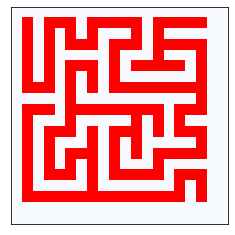

In [5]:
import copy
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import random

class Maze:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width), dtype=int)
        self.start_pos = (1, 1)
        self.end_pos = (height - 2, width - 2)
        self.visited = set()

    def generate_maze(self):
        self.grid.fill(1)  # Fill the maze with walls
        x, y = self.start_pos
        self.grid[x][y] = 0  # Mark the start position as a path
        stack = [(x, y)]

        while stack:
            cell = []
            if x + 2 < self.height - 1 and self.grid[x + 2][y] == 1:
                cell.append("down")
            if x - 2 > 0 and self.grid[x - 2][y] == 1:
                cell.append("up")
            if y + 2 < self.width - 1 and self.grid[x][y + 2] == 1:
                cell.append("right")
            if y - 2 > 0 and self.grid[x][y - 2] == 1:
                cell.append("left")

            if len(cell) > 0:
                cell_chosen = (random.choice(cell))

                if cell_chosen == "right":
                    self.grid[x][y + 1] = 0
                    self.grid[x][y + 2] = 0
                    y = y + 2
                elif cell_chosen == "left":
                    self.grid[x][y - 1] = 0
                    self.grid[x][y - 2] = 0
                    y = y - 2
                elif cell_chosen == "down":
                    self.grid[x + 1][y] = 0
                    self.grid[x + 2][y] = 0
                    x = x + 2
                elif cell_chosen == "up":
                    self.grid[x - 1][y] = 0
                    self.grid[x - 2][y] = 0
                    x = x - 2

                stack.append((x, y))
            else:
                x, y = stack.pop()

        self.end_pos = (x, y)  # Update the end position to the last cell visited
        self.grid[self.end_pos] = 0  # Ensure it's marked as a path
        print(self.grid)
    
    def display(self, player_pos=None):
        # Make a copy of the colormap instead of modifying the global colormap directly
        cmap = copy.copy(mpl.cm.get_cmap("Blues"))
        cmap.set_bad(color='red')

        masked_grid = np.ma.masked_where(self.grid == 0, self.grid)
        for pos in self.visited:
            if pos != self.start_pos and pos != self.end_pos:
                masked_grid[pos] = 0.5

        if player_pos:
            masked_grid[player_pos] = np.ma.masked

        plt.imshow(masked_grid, cmap=cmap, interpolation='none')
        plt.xticks([]), plt.yticks([])
        plt.show()

    def mark_visited(self, pos):
        if self.grid[pos] == 0:
            self.visited.add(pos)
    
    def has_reached_goal(self, current_pos):
        return current_pos == self.end_pos

    def get_possible_moves(self, current_pos):
        x, y = current_pos
        possible_moves = []
        if x > 0 and self.grid[x - 1][y] == 0:  # up
            possible_moves.append("up")
        if x < self.height - 1 and self.grid[x + 1][y] == 0:  # down
            possible_moves.append("down")
        if y > 0 and self.grid[x][y - 1] == 0:  # left
            possible_moves.append("left")
        if y < self.width - 1 and self.grid[x][y + 1] == 0:  # right
            possible_moves.append("right")
        return possible_moves

    def move_player(self, player, direction):
        if self.is_move_valid(player.position, direction):
            player.move(direction, self)
        return player.position

    def is_move_valid(self, current_pos, direction):
        x, y = current_pos
        if direction == "up":
            return x > 0 and self.grid[x - 1][y] == 0
        elif direction == "down":
            return x < self.height - 1 and self.grid[x + 1][y] == 0
        elif direction == "left":
            return y > 0 and self.grid[x][y - 1] == 0
        elif direction == "right":
            return y < self.width - 1 and self.grid[x][y + 1] == 0
        return False

class Player:
    def __init__(self, start_pos):
        self.position = start_pos

    def move(self, direction, maze):
        x, y = self.position
        if maze.is_move_valid(self.position, direction):
            new_pos = {
                "up": (x - 1, y),
                "down": (x + 1, y),
                "left": (x, y - 1),
                "right": (x, y + 1)
            }[direction]
            self.position = new_pos
            maze.mark_visited(new_pos)
            
            
            
            


def dfs(maze, position, goal, visited):
    if position == goal:
        return [position]

    visited.add(position)
    possible_moves = maze.get_possible_moves(position)

    for move in possible_moves:
        new_x, new_y = position
        if move == "up":
            new_x -= 1
        elif move == "down":
            new_x += 1
        elif move == "left":
            new_y -= 1
        elif move == "right":
            new_y += 1

        new_position = (new_x, new_y)

        if new_position not in visited:
            path = dfs(maze, new_position, goal, visited)
            if path:
                return [position] + path

    return None

# Example usage
maze = Maze(20, 20)
maze.generate_maze()
player = Player(maze.start_pos)
start_position = maze.start_pos
end_position = maze.end_pos
visited = set()

print(player.position)

path = dfs(maze, start_position, end_position, visited)

if path:
    print("Path found:", path)
    for pos in path:
        maze.mark_visited(pos)
else:
    print("No path found.")

maze.display(player.position)